# Craft Beer - Alcohol and Bitterness Analysis
## by Akshay Gupta

## Investigation Overview

- Understand the relation between the the Alcohol Percentage and Bitterness of a beer

## Dataset Overview

The dataset consists of different craft beers available across the United States. They list the following:
- Chemical composition of the beer
- Beer Origination (State, City etc.)
- Serving Size (in Oz.)

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
#Loading Cleaned Dataset
df_beer = pd.read_csv('Merged_Final.csv')
df_copy = df_beer.copy()
#Considering the top 10 beer styles by count
top_10_beer = df_copy['Beer Style'].value_counts()[0:10].index
df_beer_sub = df_copy[df_copy['Beer Style'].isin(top_10_beer)]


#Considering the top 20 Breweries by count
top_20_breweries = df_copy['Brewery Name'].value_counts()[0:15].index
df_brewery_sub = df_copy[df_copy['Brewery Name'].isin(top_20_breweries)]


#Considering the top 10 States of Breweries by count
top_10_state = df_copy['Brewery State'].value_counts()[0:10].index #Soring the index as an ordered series for ranking
df_state_sub = df_copy[df_copy['Brewery State'].isin(top_10_state)] #Keeping only the rows with the Brewery State in the top 10 states

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## ABV vs. IBU: Overall

We can see that ABV and IBU are highly correlated. They have a correlation of 0.73. Meaning if one increases, there is a high chance the other would increase too.

In other words, with the increase in the alcohol percentage, the bitterness increases.

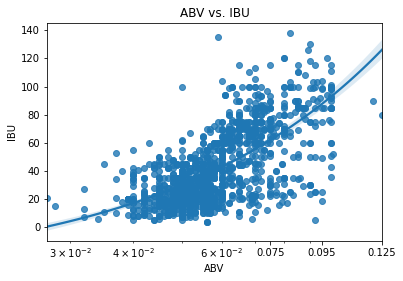

In [3]:
ticks = [0.075, 0.095, 0.125]
g = sns.regplot(data=df_copy, x='ABV', y='IBU')
g.set(xscale='log', title='ABV vs. IBU')
g.set_xticks(ticks=ticks)
g.set_xticklabels(labels=ticks);

## ABV vs. IBU: Top 10 Beer Styles

I chose the top 10 Beer styles based on the count of different beers for each style.
The results were pretty interesting. Previously, we saw that ABV and IBU are highly correlated but based on the type of beer, the slopes change.
For example, for American Pale Wheat Ale the Bitterness would be constant regardless of the alcohol content the beer has.

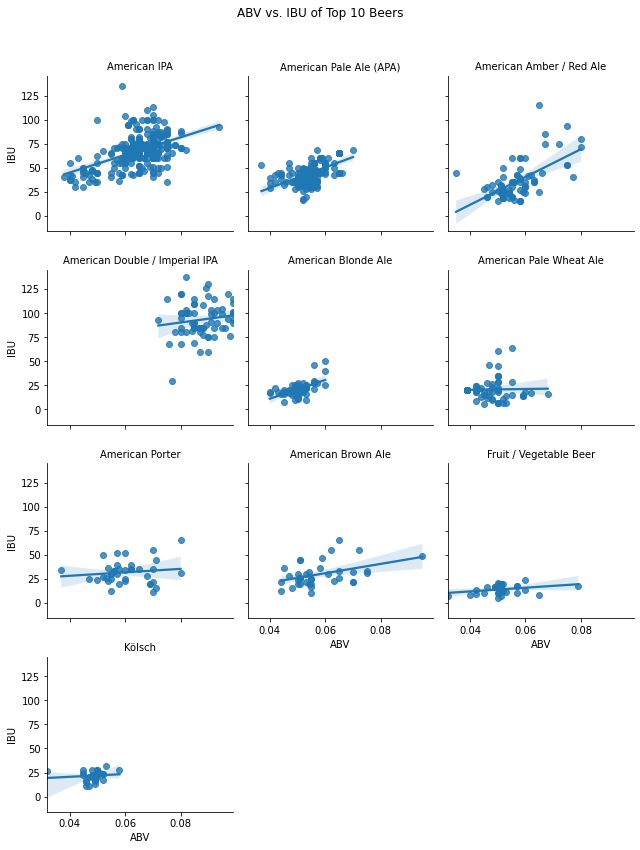

In [4]:
g = sns.FacetGrid(data=df_beer_sub, col='Beer Style', col_wrap=3,height=3, col_order=top_10_beer)
g.map(sns.regplot, "ABV", "IBU")
g.set_titles('{col_name}')
g.fig.suptitle('ABV vs. IBU of Top 10 Beers')
g.fig.subplots_adjust(top=0.9);

## ABV vs. IBU: Top 3 Beers

To reiterate, ABV and IBU are also dependent highly on the beer style, the scatter plot below clearly shows as such. 

Based on the ABV and the IBU, we can recognize which beer style would the beer close resemble to.


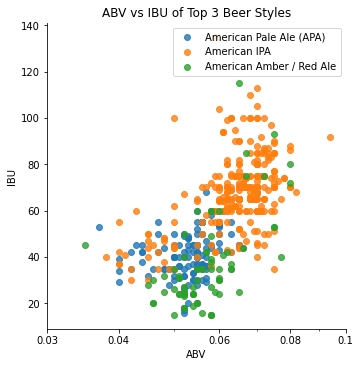

In [5]:
#Creating a dataframe of top 3 beer styles
df_beer_sub_sub = df_beer_sub[df_beer_sub['Beer Style'].isin(top_10_beer[:3])]
#Creating a FacetGrid with beer style as a hue
g = sns.FacetGrid(data=df_beer_sub_sub, hue='Beer Style', height=5)
#Mapping a regression plot (scatter plot) of ABV vs IBU
g.map(sns.regplot, "ABV", "IBU", fit_reg=False)
g.set_titles('{col_name}')
#Changing the xticks for better visualization
xticks = [0.03, 0.04, 0.06, 0.08, 0.1]
plt.xscale('log')
plt.xticks(xticks, labels=xticks)
#Adding the legend
plt.legend()
#Adding Plot Title
plt.title("ABV vs IBU of Top 3 Beer Styles");

## ABV vs. IBU: Top 10 States

States have a small say as well on the distribution of ABV and IBU. But it may not be conclusive enough to say that they are a function of determining the styleof the beer.


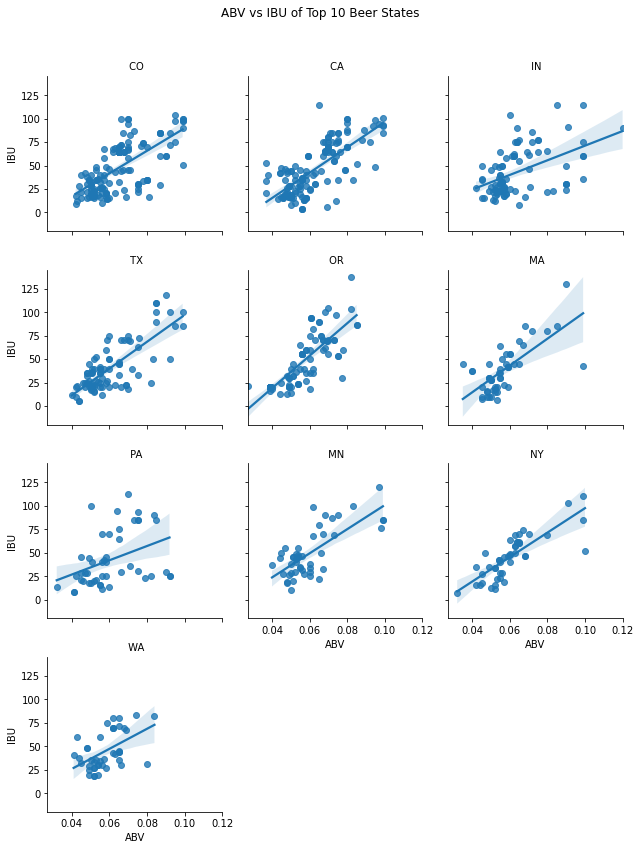

In [6]:
g = sns.FacetGrid(data=df_state_sub, col='Brewery State', col_wrap=3,height=3, col_order=top_10_state, sharex=True)
g.map(sns.regplot, "ABV", "IBU")
g.set_titles('{col_name}')
g.fig.suptitle('ABV vs IBU of Top 10 Beer States')
g.fig.subplots_adjust(top=0.9);